In [1]:
import pandas as pd
from os import path
import bz2

In [2]:
fname = path.expanduser('~/Documents/data_science/data_sources/taxi.csv.bz2') 

In [3]:
path.getsize(fname)/1024

2806.6552734375

In [4]:
with bz2.open(fname) as fp:
    print(sum(1 for line in fp))

100001


In [5]:
with bz2.open(fname, 'rt') as fp:
    for lnum, line in enumerate(fp):
        print(line[:-1])
        if lnum > 5:
            break

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 
2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,
2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038452148438,40.819576263427734,-73.907173156738281,40.811305999755859,2,1.41,12,0,0,0,0,,0,12,2,2,,
2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082458496094,40.807022094726563,-73.984642028808594,40.66314697265625,1,14.36,45,0.5,0.5,9.26,0,,0.3,55.56,1,1,,
2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200378417969,40.777961730957031,-73.926994323730469,40.772743225097656,2,1.05,6.5,0,0.5,0,0,,0.3,7.3,2,1,,
2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888061523

In [6]:
df = pd.read_csv(fname)

In [7]:
df.iloc[0]

VendorID                 2015-03-04 15:42:30
lpep_pickup_datetime                       N
Lpep_dropoff_datetime                      1
Store_and_fwd_flag                  -73.9922
RateCodeID                           40.6901
Pickup_longitude                    -73.9997
Pickup_latitude                       40.685
Dropoff_longitude                          2
Dropoff_latitude                        0.71
Passenger_count                          4.5
Trip_distance                              0
Fare_amount                              0.5
Extra                                      0
MTA_tax                                    0
Tip_amount                               NaN
Tolls_amount                             0.3
Ehail_fee                                5.3
improvement_surcharge                      2
Total_amount                               1
Payment_type                             NaN
Trip_type                                NaN
Name: (2, 2015-03-04 15:39:16), dtype: object

In [8]:
with bz2.open(fname, 'rt') as fp:
    header = fp.readline()
    data = fp.readline()
print(header)
print(data)

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 

2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,



In [9]:
len(header.split(','))

21

In [10]:
len(data.split(','))

23

In [11]:
import numpy as np
df = pd.read_csv(fname, usecols=np.arange(21))

In [12]:
df.iloc[0]

VendorID                                   2
lpep_pickup_datetime     2015-03-04 15:39:16
Lpep_dropoff_datetime    2015-03-04 15:42:30
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9922
Pickup_latitude                      40.6901
Dropoff_longitude                   -73.9997
Dropoff_latitude                      40.685
Passenger_count                            2
Trip_distance                           0.71
Fare_amount                              4.5
Extra                                      0
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                             5.3
Payment_type                               2
Trip_type                                  1
Name: 0, dtype: object

In [13]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [14]:
df = pd.read_csv(fname, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])

In [15]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [16]:
df['VendorID'].unique()

array([2, 1], dtype=int64)

In [17]:
df['vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get)
df['vendor'].head()

0    VeriFone
1    VeriFone
2    VeriFone
3    VeriFone
4    VeriFone
Name: vendor, dtype: object

In [18]:
df['vendor'].memory_usage()/(1<<20)

0.38150978088378906

In [19]:
df['vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get).astype('category')

In [20]:
df['vendor'].memory_usage()/(1<<20)

0.09546089172363281

In [21]:
df['vendor'].head().cat.codes

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [22]:
len(df[df['vendor']== 'VeriFone'])

77946

In [23]:
df['lpep_pickup_datetime'].head().dt.round('H')

0   2015-03-04 16:00:00
1   2015-03-22 18:00:00
2   2015-03-25 22:00:00
3   2015-03-16 14:00:00
4   2015-03-19 19:00:00
Name: lpep_pickup_datetime, dtype: datetime64[ns]

In [24]:
keys = df['lpep_pickup_datetime'].dt.round('H')
df.groupby(keys)

In [25]:
df.groupby(keys).count()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 00:00:00,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,0,153,153,153,153,153
2015-03-01 01:00:00,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,0,266,266,266,266,266
2015-03-01 02:00:00,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,0,241,241,241,241,241
2015-03-01 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,0,180,180,180,180,180
2015-03-01 04:00:00,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,0,172,172,172,172,172
2015-03-01 05:00:00,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,0,76,76,76,76,76
2015-03-01 06:00:00,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,0,54,54,54,54,54
2015-03-01 07:00:00,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,0,46,46,46,46,46
2015-03-01 08:00:00,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,0,48,48,48,48,48


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegird')
plt.rcParams['figure.figsize'] = (12,8)

In [27]:
plt.style.use?

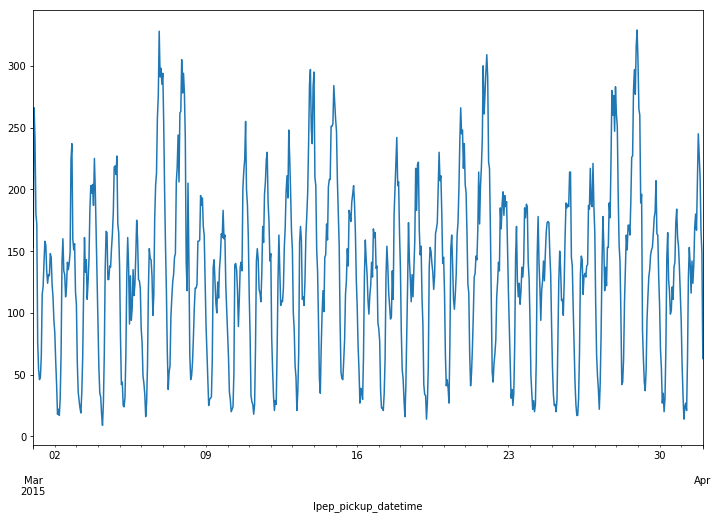

In [28]:
df.groupby(keys).count()['vendor'].plot()

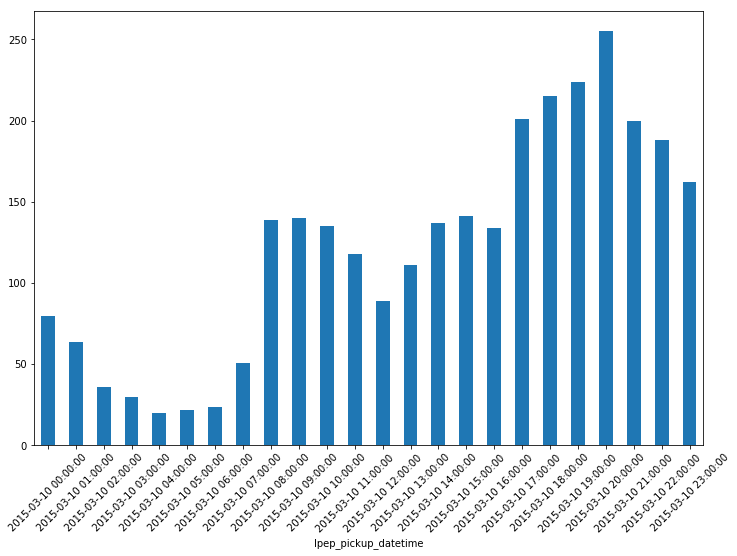

In [29]:
df.groupby(keys).count()['vendor'].loc['2015-03-10'].plot.bar(rot=45)

In [30]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day'] = df['lpep_pickup_datetime'].dt.day

In [31]:
df[['hour', 'day', 'lpep_pickup_datetime']].head()

,hour,day,lpep_pickup_datetime
0,15,4,2015-03-04 15:39:16
1,17,22,2015-03-22 17:36:49
2,22,25,2015-03-25 22:08:45
3,13,16,2015-03-16 13:45:20
4,18,19,2015-03-19 18:53:50


In [32]:
df.groupby(['vendor', 'day', 'hour']).count().head() #Create a multi index

VendorID  lpep_pickup_datetime  Lpep_dropoff_datetime  \
vendor   day hour                                                          
Creative 1   0         60.0                  60.0                   60.0   
             1         60.0                  60.0                   60.0   
             2         51.0                  51.0                   51.0   
             3         41.0                  41.0                   41.0   
             4         28.0                  28.0                   28.0   

                   Store_and_fwd_flag  RateCodeID  Pickup_longitude  \
vendor   day hour                                                     
Creative 1   0                   60.0        60.0              60.0   
             1                   60.0        60.0              60.0   
             2                   51.0        51.0              51.0   
             3                   41.0        41.0              41.0   
             4                   28.0        28.0              28.0   

                   Pickup_latitude  Dropoff_longitude  Dropoff_latitude  \
vendor   day hour                                                         
Creative 1   0                60.0               60.0              60.0   
             1                60.0               60.0              60.0   
             2                51.0               51.0              51.0   
             3                41.0               41.0              41.0   
             4                28.0               28.0              28.0   

                   Passenger_count     ...      Fare_amount  Extra  MTA_tax  \
vendor   day hour                      ...                                    
Creative 1   0                60.0     ...             60.0   60.0     60.0   
             1                60.0     ...             60.0   60.0     60.0   
             2                51.0     ...             51.0   51.0     51.0   
             3                41.0     ...             41.0   41.0     41.0   
             4                28.0     ...             28.0   28.0     28.0   

                   Tip_amount  Tolls_amount  Ehail_fee  improvement_surcharge  \
vendor   day hour                                                               
Creative 1   0           60.0          60.0        0.0                   60.0   
             1           60.0          60.0        0.0                   60.0   
             2           51.0          51.0        0.0                   51.0   
             3           41.0          41.0        0.0                   41.0   
             4           28.0          28.0        0.0                   28.0   

                   Total_amount  Payment_type  Trip_type   
vendor   day hour                                          
Creative 1   0             60.0          60.0        60.0  
             1             60.0          60.0        60.0  
             2             51.0          51.0        51.0  
             3             41.0          41.0        41.0  
             4             28.0          28.0        28.0  

[5 rows x 21 columns]

In [33]:
ddf = df.groupby(['vendor', 'day', 'hour'], as_index=False).count()
ddf.head()

,vendor,day,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,1,0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
1,Creative,1,1,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
2,Creative,1,2,51.0,51.0,51.0,51.0,51.0,51.0,51.0,...,51.0,51.0,51.0,51.0,51.0,0.0,51.0,51.0,51.0,51.0
3,Creative,1,3,41.0,41.0,41.0,41.0,41.0,41.0,41.0,...,41.0,41.0,41.0,41.0,41.0,0.0,41.0,41.0,41.0,41.0
4,Creative,1,4,28.0,28.0,28.0,28.0,28.0,28.0,28.0,...,28.0,28.0,28.0,28.0,28.0,0.0,28.0,28.0,28.0,28.0


In [34]:
hdf = ddf.groupby(['vendor', 'hour'], as_index=False).median()
hdf.head()
#hdf['vendor'].plot()

,vendor,hour,day,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,0,16,23.0,23.0,23.0,23.0,23.0,23.0,23.0,...,23.0,23.0,23.0,23.0,23.0,0.0,23.0,23.0,23.0,23.0
1,Creative,1,16,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,18.0
2,Creative,2,16,11.5,11.5,11.5,11.5,11.5,11.5,11.5,...,11.5,11.5,11.5,11.5,11.5,0.0,11.5,11.5,11.5,11.5
3,Creative,3,16,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,8.0
4,Creative,4,16,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0


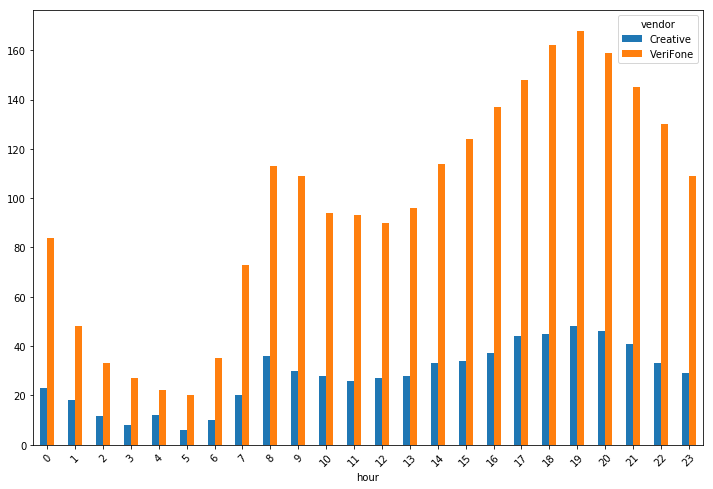

In [39]:
vdf = hdf.pivot(index='hour', columns='vendor', values='Extra')
vdf.plot.bar(rot=45)

In [ ]:
vdf = hdf.pivot

In [40]:
import sqlite3

In [41]:
dbname = path.expanduser('~/Documents/data_science/data_sources/weather.db')

In [42]:
con = sqlite3.connect(dbname)

In [43]:
wdf = pd.read_sql('select * from weather', con)
wdf.columns

Index(['STATION', 'DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [44]:
wdf = pd.read_sql('select * from weather', con, parse_dates=['DATE'], index_col='DATE')
wdf.dtypes

STATION     object
PRCP       float64
SNOW       float64
TMAX         int64
TMIN         int64
dtype: object

In [45]:
wdf.index

DatetimeIndex(['2015-03-01', '2015-03-02', '2015-03-03', '2015-03-04',
               '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-08',
               '2015-03-09', '2015-03-10',
               ...
               '2016-03-23', '2016-03-24', '2016-03-25', '2016-03-26',
               '2016-03-27', '2016-03-28', '2016-03-29', '2016-03-30',
               '2016-03-31', '2016-04-01'],
              dtype='datetime64[ns]', name='DATE', length=398, freq=None)

In [46]:
wdf.describe()

,PRCP,SNOW,TMAX,TMIN
count,398.000000,398.000000,398.000000,398.000000
mean,0.109799,0.129146,65.017588,50.035176
std,0.310245,1.463461,17.556593,16.336782
min,0.000000,0.000000,15.000000,-1.000000
25%,0.000000,0.000000,52.000000,38.000000
50%,0.000000,0.000000,65.000000,50.000000
75%,0.020000,0.000000,81.750000,65.000000
max,2.310000,27.300000,97.000000,82.000000


In [49]:
from scipy.constants import convert_temperature
wdf['tempF'] = convert_temperature(wdf['TMAX']/10, 'C', 'F')

In [50]:
wdf.describe()

,PRCP,SNOW,TMAX,TMIN,tempF
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.109799,0.129146,65.017588,50.035176,43.703166
std,0.310245,1.463461,17.556593,16.336782,3.160187
min,0.000000,0.000000,15.000000,-1.000000,34.700000
25%,0.000000,0.000000,52.000000,38.000000,41.360000
50%,0.000000,0.000000,65.000000,50.000000,43.700000
75%,0.020000,0.000000,81.750000,65.000000,46.715000
max,2.310000,27.300000,97.000000,82.000000,49.460000


In [51]:
wdf.head()

,STATION,PRCP,SNOW,TMAX,TMIN,tempF
DATE,,,,,,
2015-03-01,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,GHCND:USW00094728,0.76,7.5,40,19,39.20


In [57]:
ddf = df.groupby(df['lpep_pickup_datetime'].dt.date).count()
jdf = ddf.join(wdf)
jdf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Trip_type,vendor,hour,day,STATION,PRCP,SNOW,TMAX,TMIN,tempF
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01,3177,3177,3177,3177,3177,3177,3177,3177,3177,3177,...,3177,3177,3177,3177,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,2775,2775,2775,2775,2775,2775,2775,2775,2775,2775,...,2775,2775,2775,2775,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,...,3072,3072,3072,3072,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,GHCND:USW00094728,0.76,7.5,40,19,39.20


Text(0,0.5,'Daily Rides')

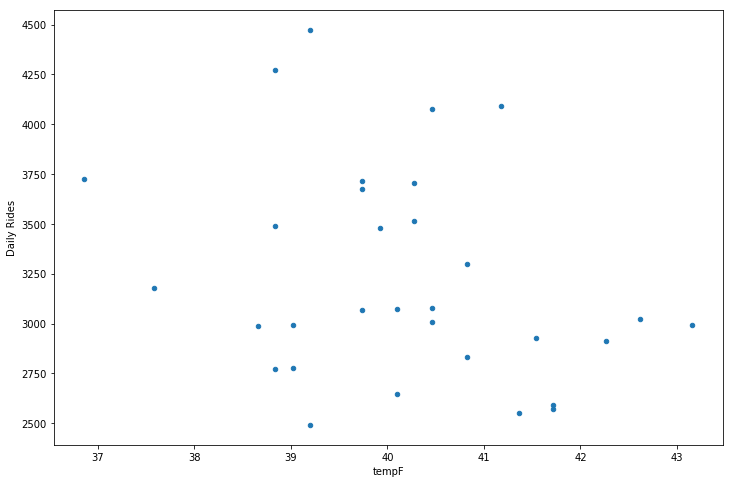

In [61]:
ax = jdf.plot.scatter(x='tempF', y='vendor')
ax.set_ylabel('Daily Rides')